In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
# Best fit of image inside the notebook
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import os
os.getcwd()

'/Users/punchh_adityas/Desktop/python/9th_oct_22'

In [5]:
data = pd.read_csv('../datasets/HR_Employee_Attrition_Data1.csv')

In [7]:
empdf = data.copy()

In [8]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
empdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
empdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
empdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Count Plot

Text(0.5, 1.0, 'Distribution of Gender')

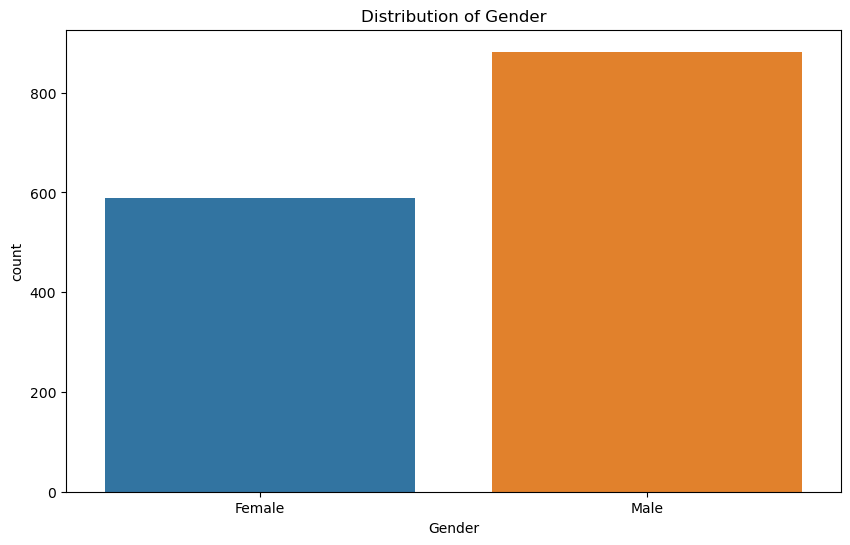

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=empdf)
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Distribution of BusinessTravel')

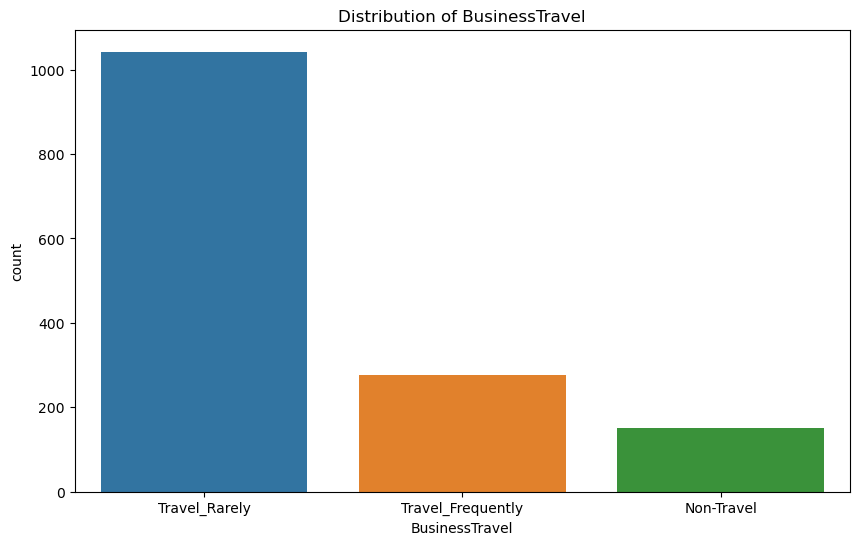

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel', data=empdf)
plt.title('Distribution of BusinessTravel')

Text(0.5, 1.0, 'Distribution of Department')

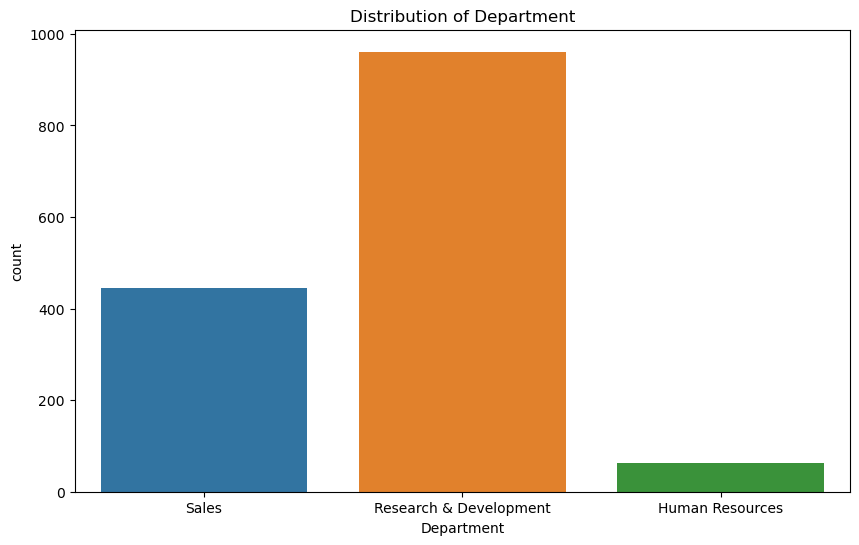

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department', data=empdf)
plt.title('Distribution of Department')

Text(0.5, 1.0, 'Distribution of JobRole and Gender')

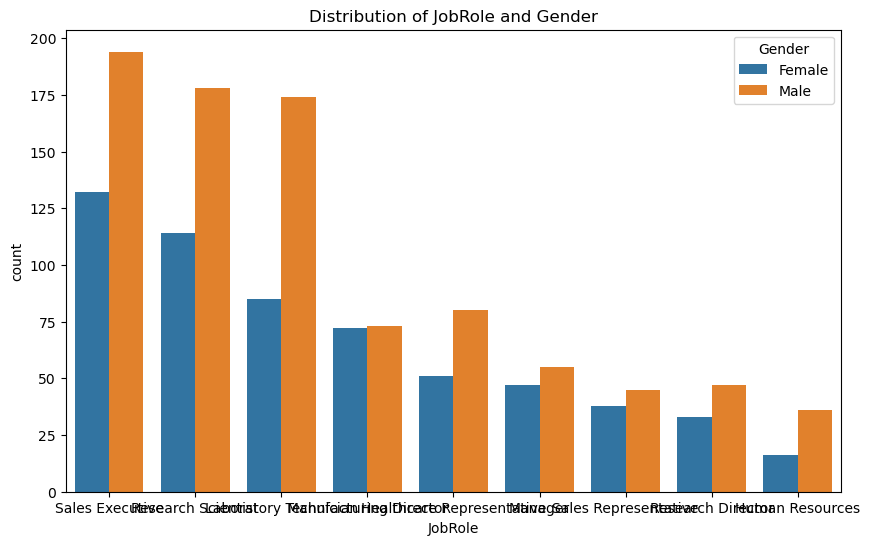

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole', data=empdf, hue="Gender")
plt.title('Distribution of JobRole and Gender')

Text(0.5, 1.0, 'Distribution of JobRole and Gender')

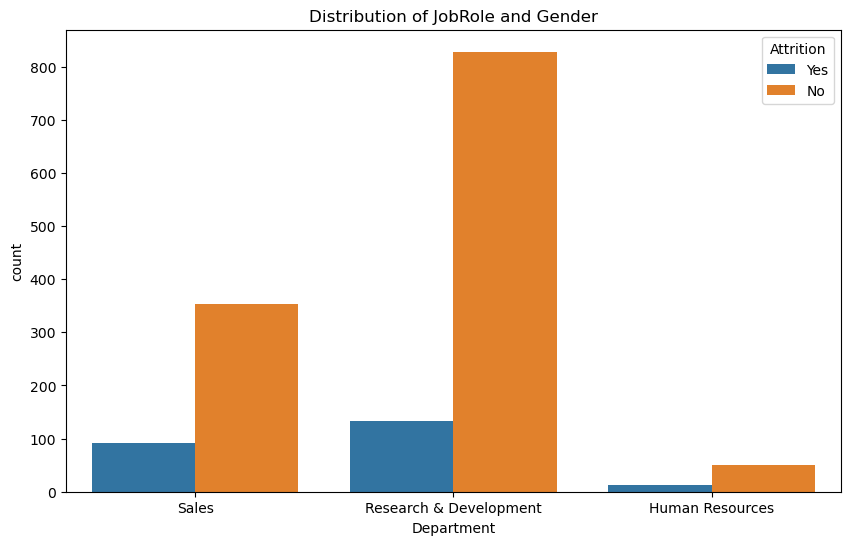

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department', data=empdf, hue="Attrition")
plt.title('Distribution of JobRole and Gender')

# Factor Plot

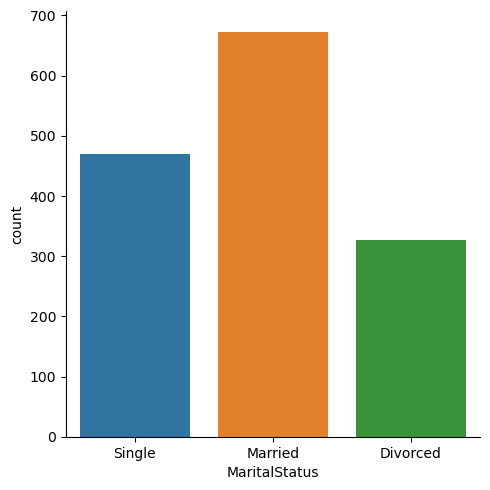

In [21]:
sns.factorplot(x="MaritalStatus", kind="count",data=empdf)

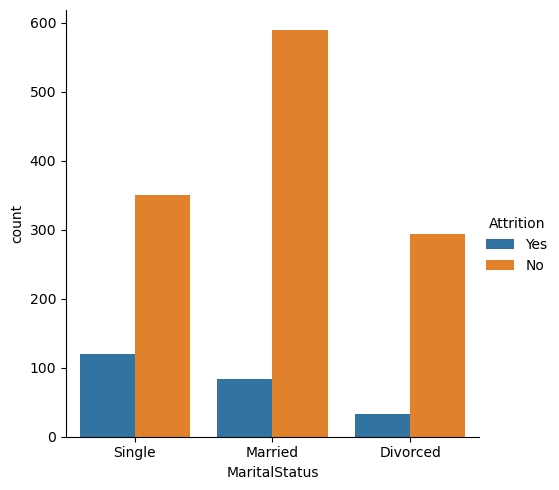

In [22]:
sns.factorplot(x="MaritalStatus", kind="count",data=empdf, hue='Attrition')

# Bar plot

Text(0.5, 1.0, 'Distribution of JobRole and Gender')

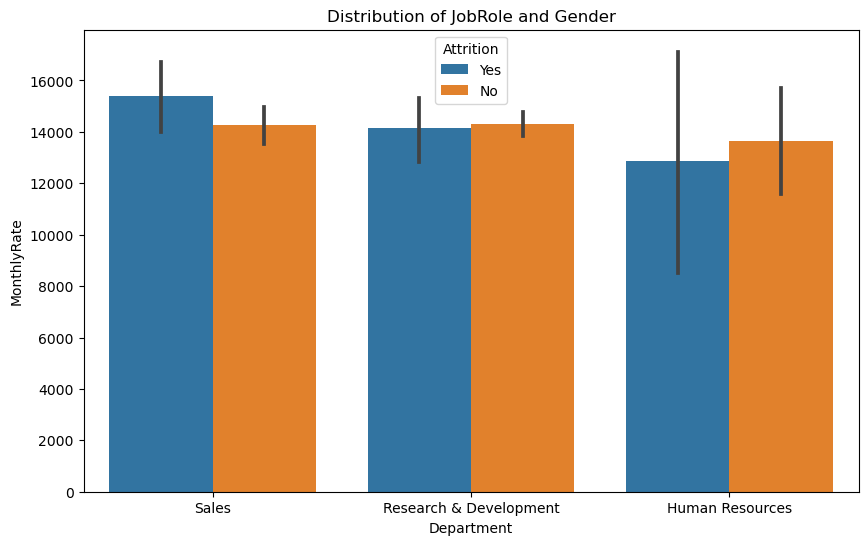

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department',y="MonthlyRate", data=empdf, hue="Attrition")
plt.title('Distribution of JobRole and Gender')

Text(0.5, 1.0, 'Distribution of Department')

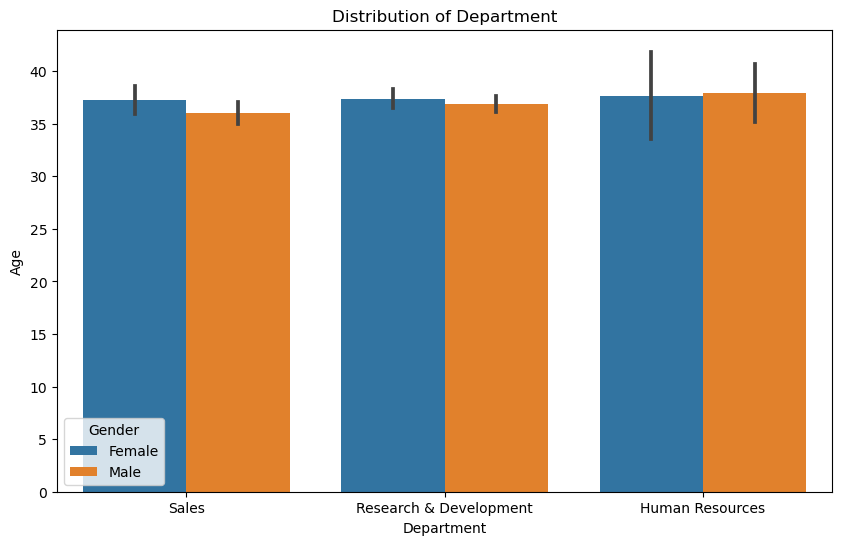

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department',y="Age", data=empdf, hue="Gender")
plt.title('Distribution of Department')

Text(0.5, 1.0, 'Distribution of JobSatisfaction')

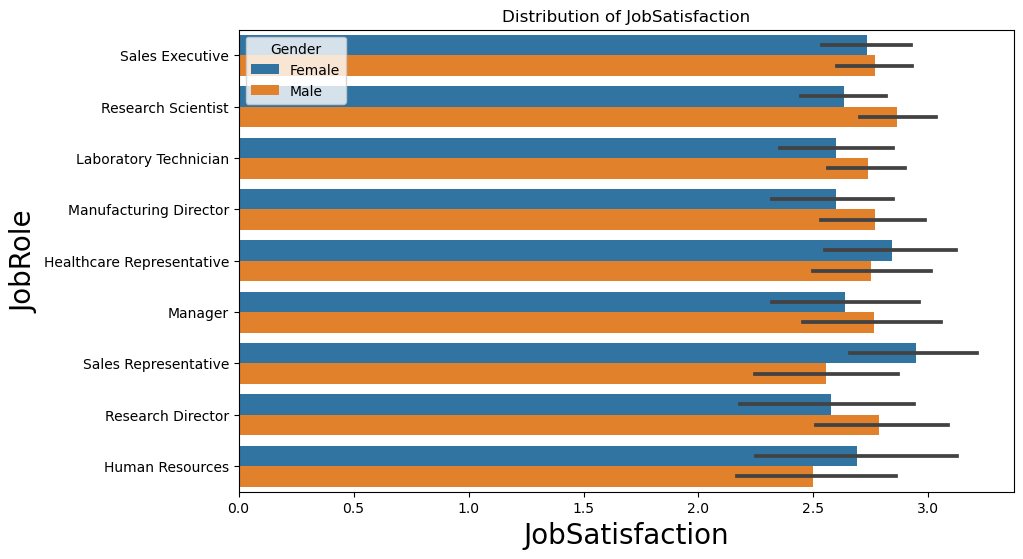

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='JobSatisfaction',y="JobRole", data=empdf, hue="Gender")
#ax.set(ylabel ='JobRole')
plt.ylabel("JobRole", fontsize =20)
plt.xlabel("JobSatisfaction", fontsize =20)
plt.title('Distribution of JobSatisfaction')

# Histogram

Text(0.5, 1.0, 'Distribution of JobSatisfaction')

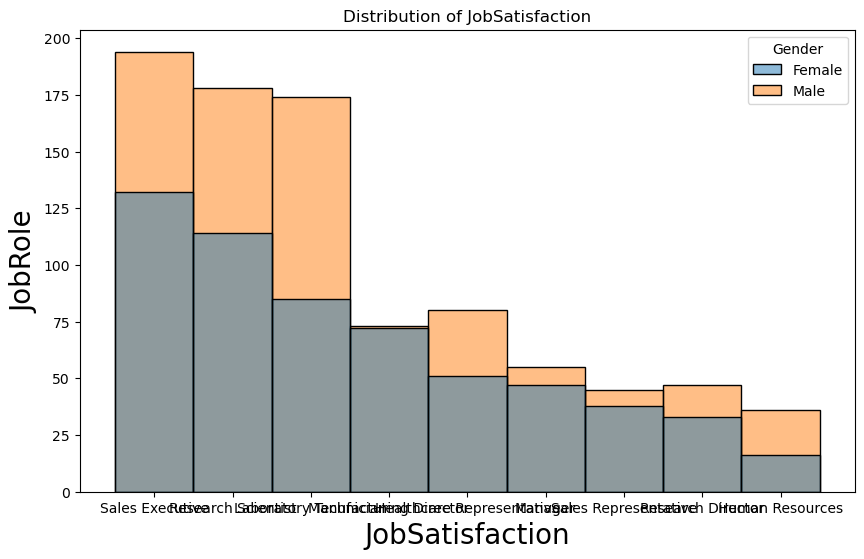

In [32]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="JobRole", data=empdf, hue="Gender")
#ax.set(ylabel ='JobRole')
# plt.ylabel("JobRole", fontsize =20)
# plt.xlabel("JobSatisfaction", fontsize =20)
plt.title('Distribution of JobSatisfaction')

Text(0.5, 1.0, 'Distribution of JobSatisfaction')

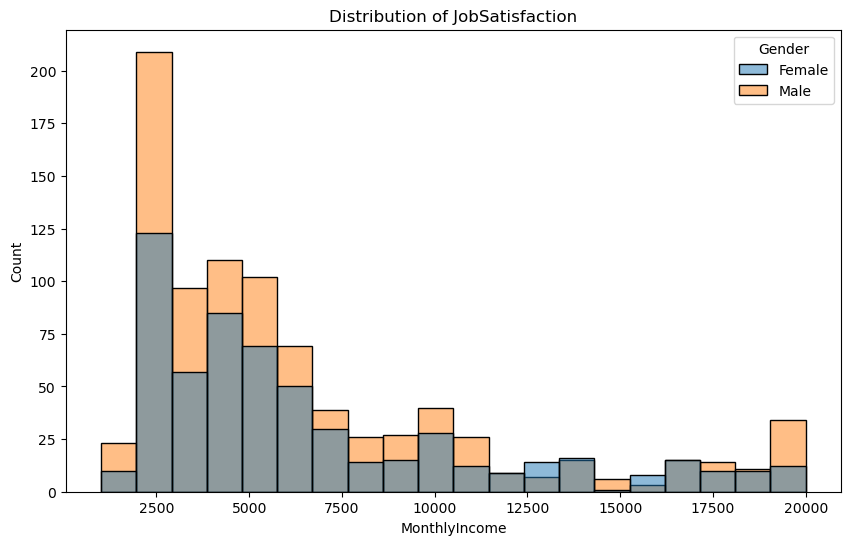

In [33]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf, hue="Gender")
plt.title('Distribution of JobSatisfaction')

Text(0.5, 1.0, 'Distribution of JobSatisfaction')

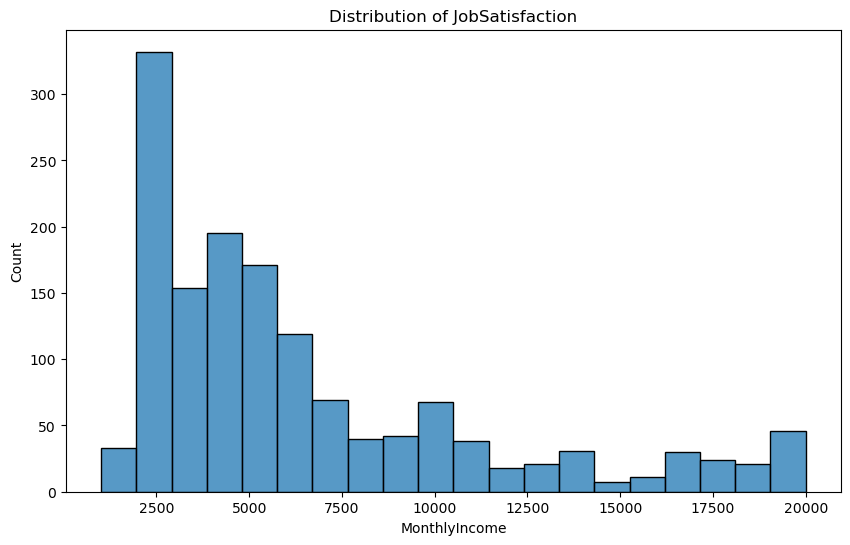

In [34]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf)
plt.title('Distribution of JobSatisfaction')

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

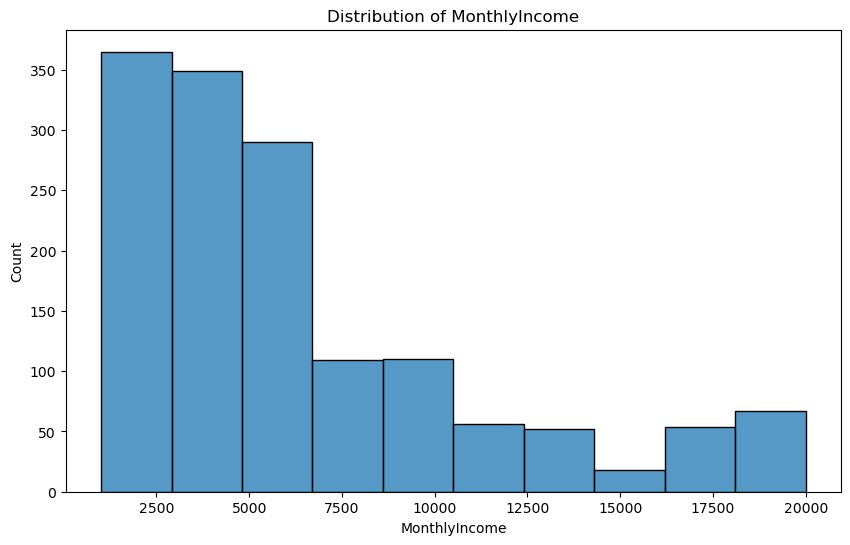

In [37]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf, bins=10)
plt.title('Distribution of MonthlyIncome')

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

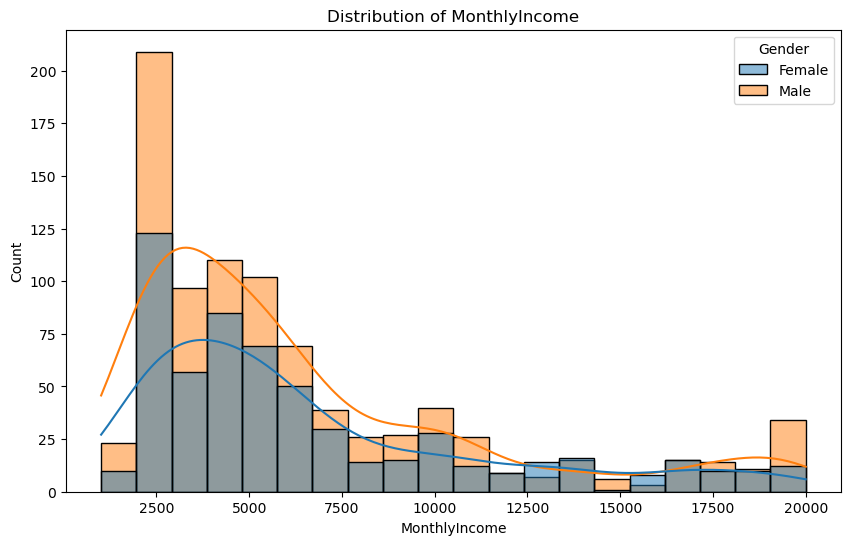

In [38]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf, hue="Gender", kde=True)
plt.title('Distribution of MonthlyIncome')

Text(0.5, 1.0, 'Distribution of Age')

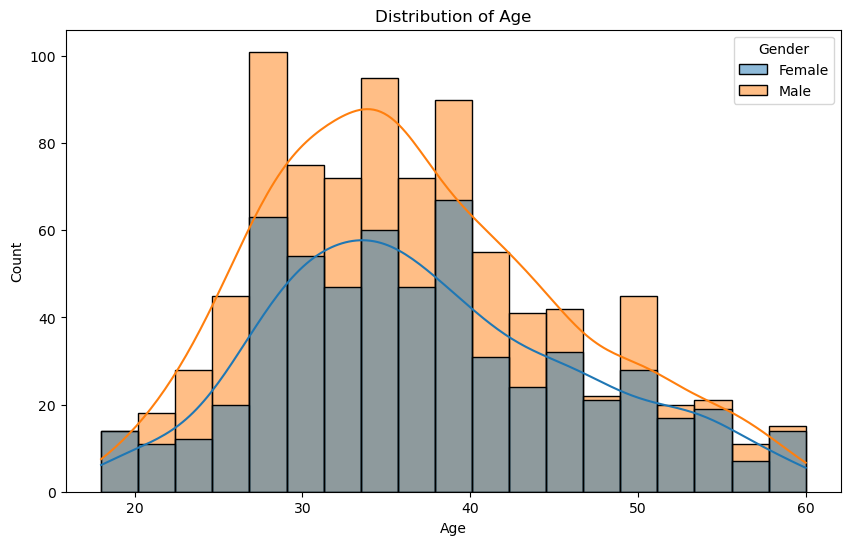

In [39]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="Age", data=empdf, hue="Gender", kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

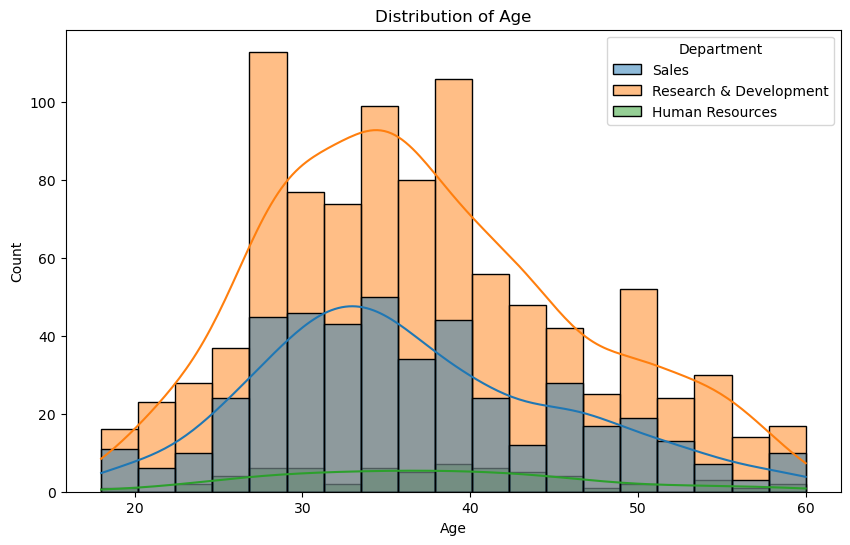

In [40]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="Age", data=empdf, hue="Department", kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

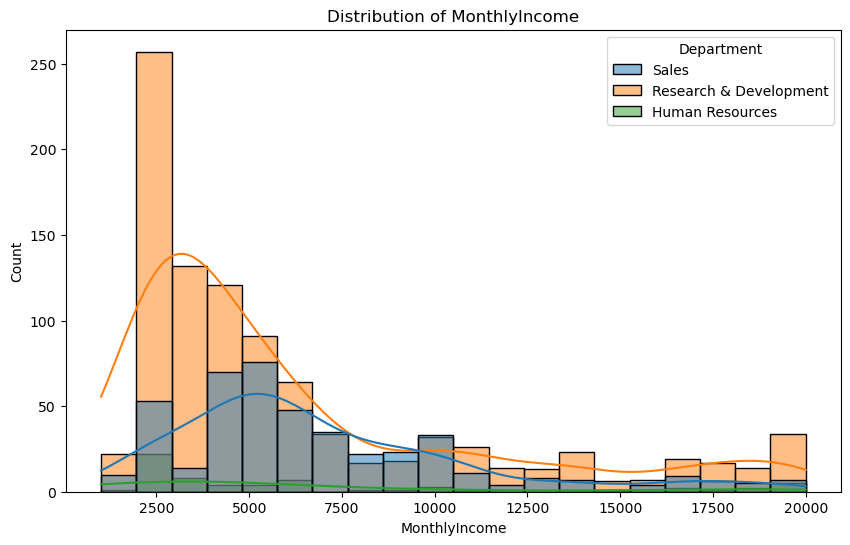

In [41]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf, hue="Department", kde=True)
plt.title('Distribution of MonthlyIncome')

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

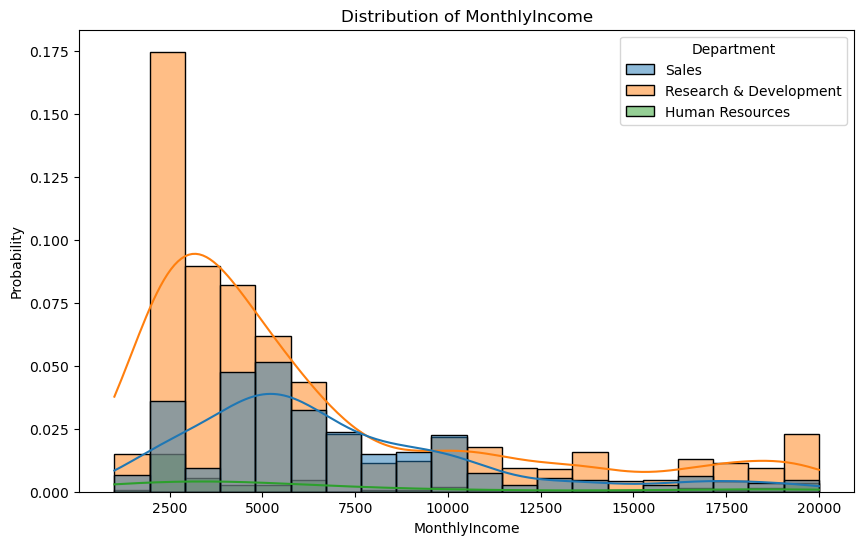

In [42]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x="MonthlyIncome", data=empdf, hue="Department", kde=True, stat='probability')
plt.title('Distribution of MonthlyIncome')

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

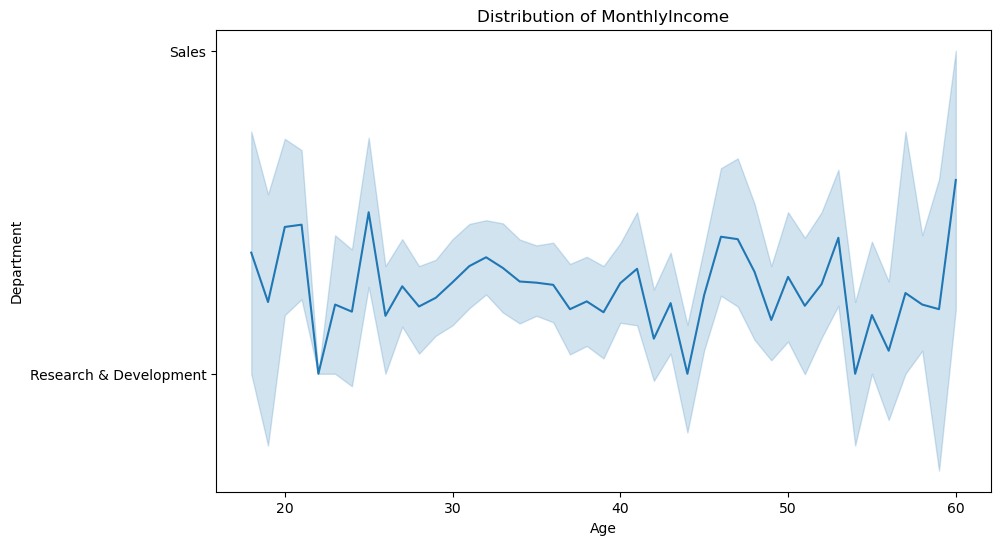

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Age",y='Department', data=empdf)
#sns.lineplot(x="MonthlyIncome", data=empdf, hue="Department", kde=True)
plt.title('Distribution of MonthlyIncome')

# Pie plot

([<matplotlib.patches.Wedge at 0x7f8582d95d00>,
 [Text(-0.9618916732177651, 0.5336332157899546, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

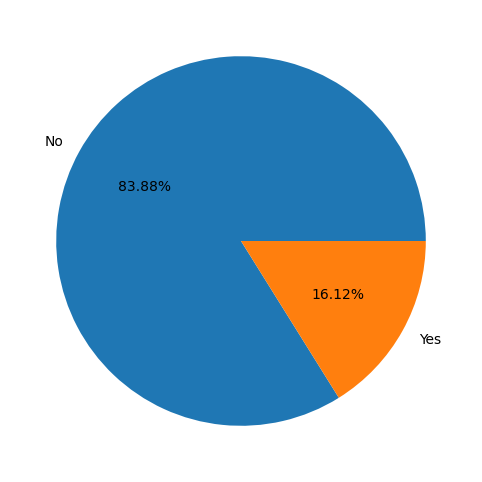

In [51]:
plt.figure(figsize=(10,6))
plt.pie(x=empdf['Attrition'].value_counts(), labels=empdf['Attrition'].value_counts().index, autopct="%0.2f%%" )

([<matplotlib.patches.Wedge at 0x7f85821a1cd0>,
 [Text(-0.3399187721714582, 1.046162142464278, 'Male'),
  Text(0.3399188701202255, -1.0461621106387813, 'Female')],
 [Text(-0.18541023936624992, 0.5706338958896061, '60.00%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.00%')])

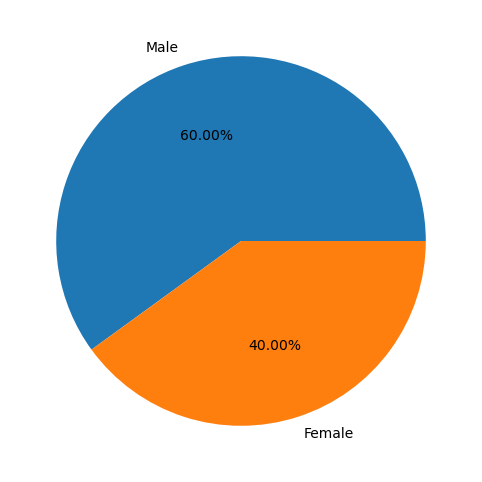

In [52]:
plt.figure(figsize=(10,6))
plt.pie(x=empdf['Gender'].value_counts(), labels=empdf['Gender'].value_counts().index, autopct="%0.2f%%" )

([<matplotlib.patches.Wedge at 0x7f8582193b80>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.3754855570128839, -1.0339296864268501, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37%'),
  Text(0.20481030382520937, -0.5639616471419181, '30.34%'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29%')])

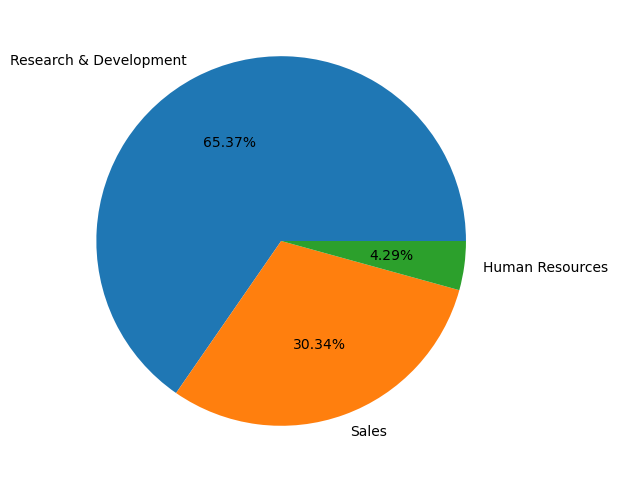

In [53]:
plt.figure(figsize=(10,6))
plt.pie(x=empdf['Department'].value_counts(), labels=empdf['Department'].value_counts().index, autopct="%0.2f%%" )

([<matplotlib.patches.Wedge at 0x7f8583453970>,
 [Text(0.2994329091618902, 1.0584611154458379, 'Life Sciences'),
  Text(-0.9951095091219136, -0.4687825347164123, 'Medical'),
  Text(0.2194966396897843, -1.0778781123878958, 'Marketing'),
  Text(0.806357022319634, -0.7481900510938471, 'Technical Degree'),
  Text(1.05386333339301, -0.315233365191208, 'Other'),
  Text(1.09816922292375, -0.06343782643697084, 'Human Resources')],
 [Text(0.16332704136103102, 0.5773424266068207, '41.22%'),
  Text(-0.5427870049755892, -0.2556995643907703, '31.56%'),
  Text(0.11972543983079142, -0.5879335158479431, '10.82%'),
  Text(0.4398311030834367, -0.4081036642330074, '8.98%'),
  Text(0.5748345454870963, -0.17194547192247708, '5.58%'),
  Text(0.5990013943220454, -0.03460245078380227, '1.84%')])

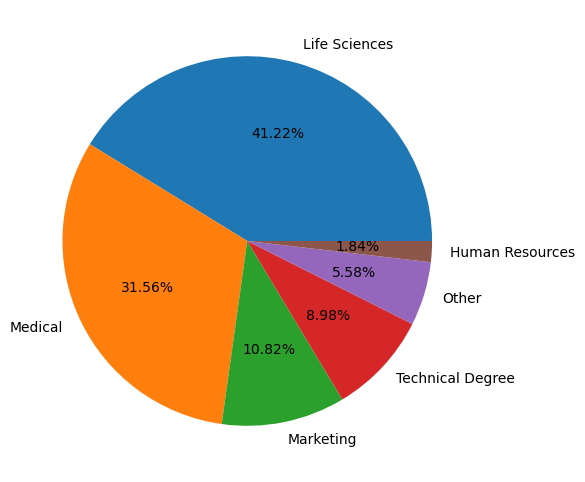

In [56]:
plt.figure(figsize=(10,6))
plt.pie(x=empdf['EducationField'].value_counts(), labels=empdf['EducationField'].value_counts().index, autopct="%0.2f%%" )

([<matplotlib.patches.Wedge at 0x7f8583d212e0>,
 [Text(0.2994329091618902, 1.0584611154458379, 'Life Sciences'),
  Text(-1.0855740099511786, -0.5113991287815407, 'Medical'),
  Text(0.2194966396897843, -1.0778781123878958, 'Marketing'),
  Text(0.806357022319634, -0.7481900510938471, 'Technical Degree'),
  Text(1.05386333339301, -0.315233365191208, 'Other'),
  Text(1.09816922292375, -0.06343782643697084, 'Human Resources')],
 [Text(0.16332704136103102, 0.5773424266068207, '41.22%'),
  Text(-0.633251505804854, -0.2983161584558987, '31.56%'),
  Text(0.11972543983079142, -0.5879335158479431, '10.82%'),
  Text(0.4398311030834367, -0.4081036642330074, '8.98%'),
  Text(0.5748345454870963, -0.17194547192247708, '5.58%'),
  Text(0.5990013943220454, -0.03460245078380227, '1.84%')])

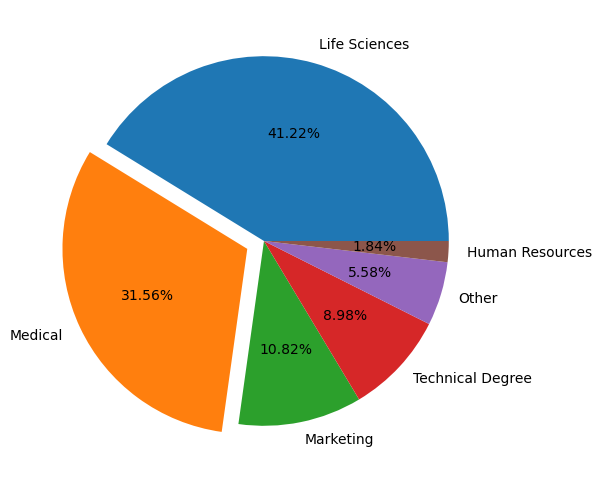

In [60]:
plt.figure(figsize=(10,6))
plt.pie(x=empdf['EducationField'].value_counts(), labels=empdf['EducationField'].value_counts().index, autopct="%0.2f%%", explode=[0, 0.1, 0, 0, 0, 0])

# Box plot

<AxesSubplot:xlabel='Age'>

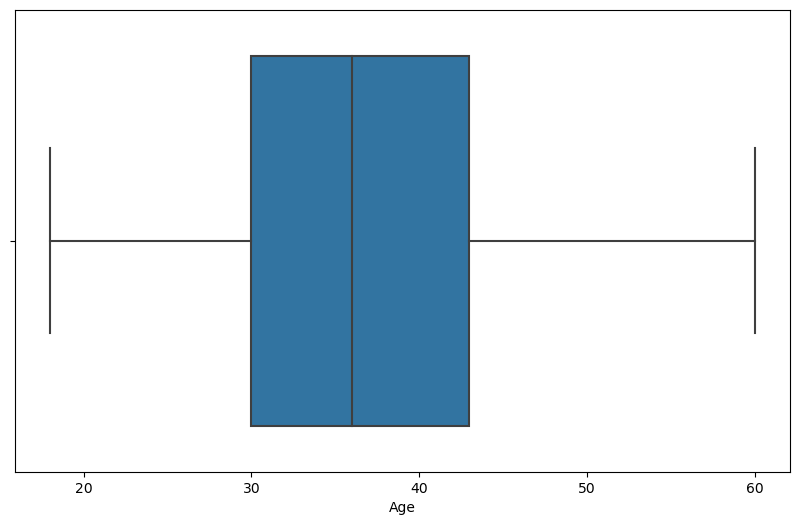

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(empdf['Age'])

<AxesSubplot:xlabel='DailyRate'>

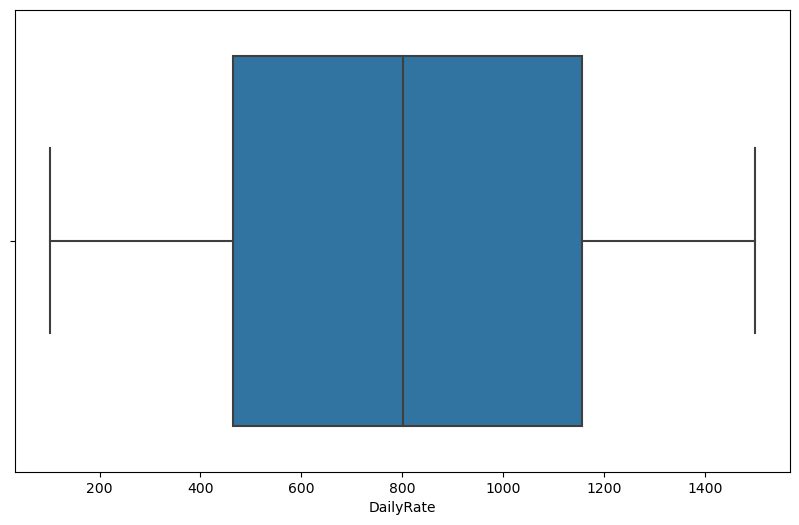

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(empdf['DailyRate'])

<AxesSubplot:xlabel='TotalWorkingYears'>

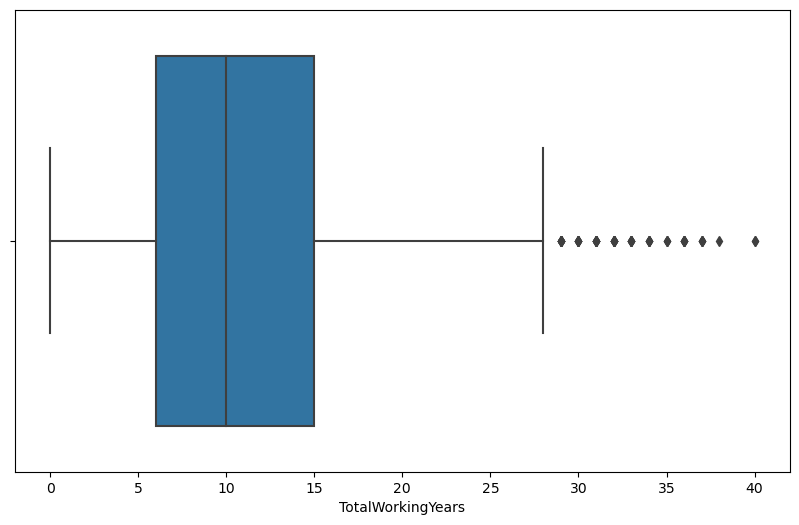

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(empdf['TotalWorkingYears'])

<AxesSubplot:ylabel='TotalWorkingYears'>

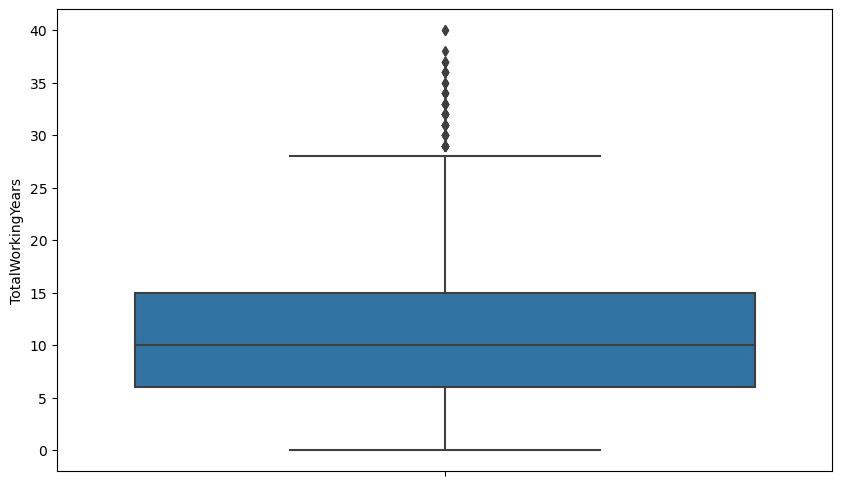

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(y = empdf['TotalWorkingYears'])

<AxesSubplot:ylabel='TotalWorkingYears'>

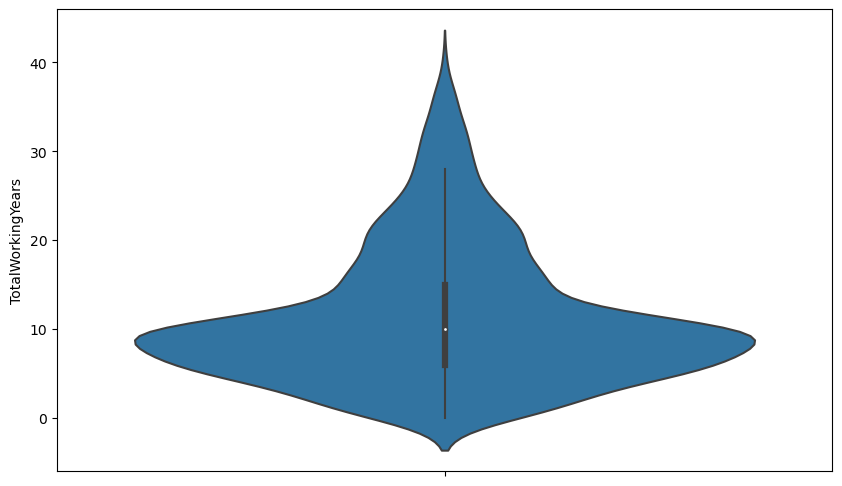

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(y = empdf['TotalWorkingYears'])

<AxesSubplot:ylabel='Age'>

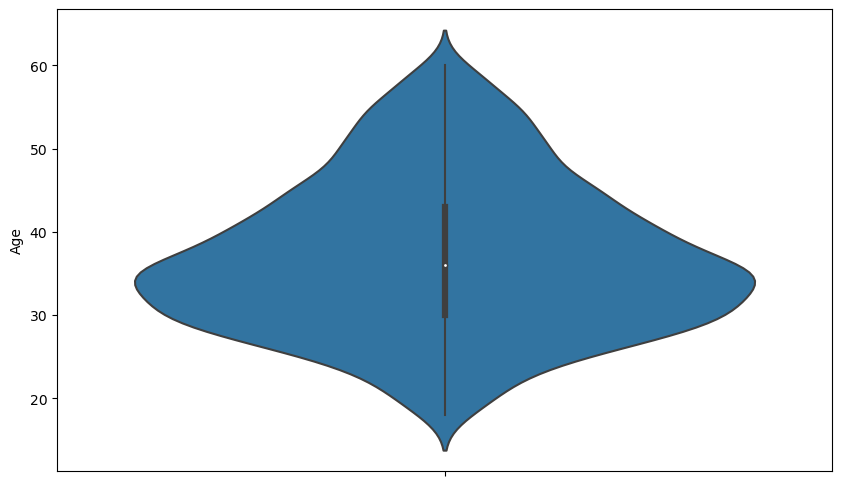

In [70]:
plt.figure(figsize=(10,6))
sns.violinplot(y = empdf['Age'])